In [1]:
#imports - Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#data frame of all earthquakes globally
df = pd.read_csv("earthquakes.csv")

# EDA

In [29]:
#show all columns, datatypes and number of elements
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15586 entries, 0 to 15585
Data columns (total 22 columns):
time               15586 non-null object
latitude           15586 non-null float64
longitude          15586 non-null float64
depth              15586 non-null float64
mag                15586 non-null float64
magType            15586 non-null object
nst                10615 non-null float64
gap                11940 non-null float64
dmin               11726 non-null float64
rms                15586 non-null float64
net                15586 non-null object
id                 15586 non-null object
updated            15586 non-null object
place              15586 non-null object
type               15586 non-null object
horizontalError    10937 non-null float64
depthError         15585 non-null float64
magError           11605 non-null float64
magNst             11889 non-null float64
status             15586 non-null object
locationSource     15586 non-null object
magSource         

In [131]:
#Explorating some columns
print("Types, We're only interested in earthquakes\n{}".format(df["type"].value_counts()))

Types, We're only interested in earthquakes
earthquake      15369
quarry blast       90
ice quake          66
explosion          60
other event         1
Name: type, dtype: int64


In [132]:
#Selecting earthquakes and showing the magnitude max an min values
earthquakes = df.loc[df["type"] == "earthquake"].copy().drop(["type"], axis=1)
print("GLOBAL EARTHQUAKES")
print("MIN MAGNITUDE: {}\nMAX MAGNITUDE: {}".format(min(df["mag"]) ,max(df["mag"])))

GLOBAL EARTHQUAKES
MIN MAGNITUDE: -1.38
MAX MAGNITUDE: 6.8


In [148]:
#Filter by Puerto Rico, for now, this is the point of interest
isPuertoRico = list(filter(lambda row: ("Puerto Rico" in row), earthquakes["place"]))
pr = earthquakes.loc[earthquakes['place'].isin(isPuertoRico)].copy().drop(["id"], axis=1).reset_index()

#Show PR data
pr.head()

,index,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,...,net,updated,place,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,10,2020-01-10T22:54:51.220Z,17.9495,-66.8153,8.0,3.04,md,12.0,198.0,0.0688,...,pr,2020-01-11T03:30:34.987Z,"7km SSE of Indios, Puerto Rico",0.94,1.07,0.450,7.0,reviewed,pr,pr
1,17,2020-01-10T22:27:43.393Z,17.8714,-66.8779,10.0,3.90,ml,NaN,230.0,0.1030,...,us,2020-01-11T10:18:37.715Z,"11km SSE of Guanica, Puerto Rico",1.30,1.80,0.085,18.0,reviewed,us,us
2,18,2020-01-10T22:26:25.000Z,17.9350,-66.8830,9.0,5.20,ml,15.0,216.0,0.0403,...,pr,2020-01-11T17:09:36.040Z,"4km SSW of Indios, Puerto Rico",0.97,0.67,0.200,5.0,reviewed,pr,pr
3,25,2020-01-10T21:44:25.790Z,17.9501,-66.8790,8.0,3.34,md,12.0,202.0,0.0250,...,pr,2020-01-11T03:01:33.624Z,"7km SSE of Guanica, Puerto Rico",1.02,0.80,0.410,7.0,reviewed,pr,pr
4,59,2020-01-10T19:15:23.680Z,17.9590,-66.8211,12.0,2.75,md,12.0,197.0,0.0603,...,pr,2020-01-11T17:38:38.040Z,"3km ESE of Indios, Puerto Rico",2.24,1.37,0.060,3.0,reviewed,pr,pr


In [78]:
#EXPLORATING SOME COLUMNS TO VERIFY IS WE CAN DELETE THEM
print(pr["status"].value_counts())
print("==")
print(pr["locationSource"].value_counts())
print("==")
print(pr["magSource"].value_counts())
print("==")
print(pr["net"].value_counts())

#These columns can be deleted because don't affect the analysis of earthquakes

reviewed    1866
Name: status, dtype: int64
==
pr    1836
us      30
Name: locationSource, dtype: int64
==
pr    1836
us      30
Name: magSource, dtype: int64
==
pr    1836
us      30
Name: net, dtype: int64


----------------------------------------------------------------------------------------------

# CREATE GOOGLE MAP WITH ALL POINTS

LATITUDE AND LONGITUDE (MAX AND MIN):  (-67.975, -65.1561, 17.0863, 19.6401)


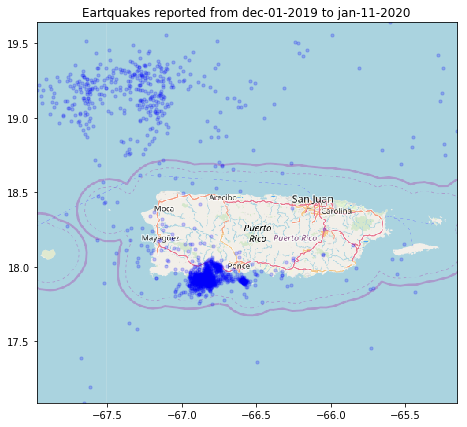

This map shows 1866 earthquakes reported nearby Puerto Rico from Dec 2019 to Jan 11, 2020
Ya que hay muchos temblores que no 


In [159]:
#Latitute and longitude of all earthquakes nearby PR (firts FIVE)
show_pr_map(pr, img_path="./map.png", title="Eartquakes reported from dec-01-2019 to jan-11-2020")
print("This map shows {} earthquakes reported nearby Puerto Rico from Dec 2019 to Jan 11, 2020".format(len(pr)))
print("Ya que hay muchos temblores que no ")

----------------------------------------------------------------------------

In [160]:
#Sinse in the map we can note that there are a lot of earthquakes that we dont care, we're going to clean the data more.
#Get only the earthquakes with a magnitude greater or equal than 3.
newPR = pr.loc[pr["mag"] >= 3].copy().drop(["status", "locationSource", "magSource", "net"], axis=1 )
newPR.info()
print("\nWith the info(), we can figure out how many rows we have, also we can look is there are missing values")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 0 to 1859
Data columns (total 17 columns):
index              276 non-null int64
time               276 non-null object
latitude           276 non-null float64
longitude          276 non-null float64
depth              276 non-null float64
mag                276 non-null float64
magType            276 non-null object
nst                248 non-null float64
gap                276 non-null float64
dmin               276 non-null float64
rms                276 non-null float64
updated            276 non-null object
place              276 non-null object
horizontalError    276 non-null float64
depthError         276 non-null float64
magError           276 non-null float64
magNst             276 non-null float64
dtypes: float64(12), int64(1), object(4)
memory usage: 38.8+ KB

With the info(), we can figure out how many rows we have, also we can look is there are missing values


LATITUDE AND LONGITUDE (MAX AND MIN):  (-67.9438, -65.1561, 17.0863, 19.6401)


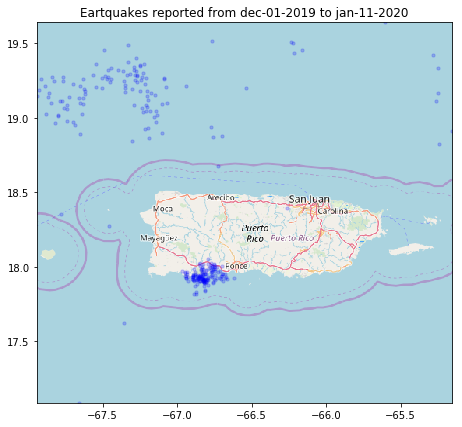

This map shows 276 earthquakes reported nearby Puerto Rico from Dec 2019 to Jan 11, 2020


In [161]:
show_pr_map(newPR, img_path="./map.png", title="Eartquakes reported from dec-01-2019 to jan-11-2020")
print("This map shows {} earthquakes reported nearby Puerto Rico from Dec 2019 to Jan 11, 2020".format(len(newPR)))

LATITUDE AND LONGITUDE (MAX AND MIN):  (-66.9705, -66.2633, 17.8283, 18.393)


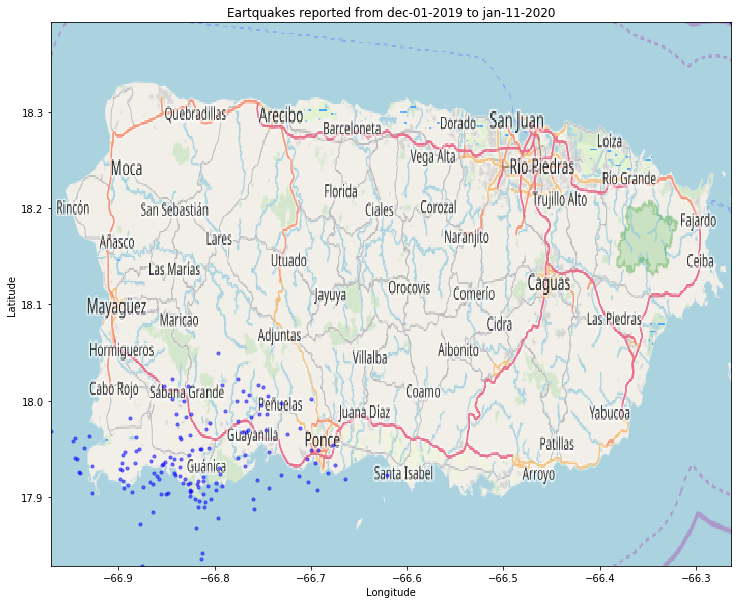

This map shows 148 earthquakes with a magnitude >= 3 reported nearby Puerto Rico from Dec 2019 to Jan 11, 2020


In [204]:
#Since in the map above we can look there are many earthquakes in the top of PR, 
#we can filter the data to only those really nearby Puerto Rico
#Using OpenStreetMap I figured out the boundaries for the latitude and longitude that I want to display and analyze
#MIN LATITUDE: 18.6004, MAX LATITUDE: 17.8203
#MIN LONGITUDE: -67.3039, MAX LONGITUDE: -65.5587
newPR = newPR[np.logical_and(newPR["latitude"] > 17.8203, newPR["latitude"] < 18.6004 )]
newPR = newPR[np.logical_and(newPR["longitude"] < -65.5587, newPR["longitude"] > -67.3039)]
show_pr_map(newPR, img_path="./pr2.png", title="Eartquakes reported from dec-01-2019 to jan-11-2020", size=(20,10))
print("This map shows {} earthquakes with a magnitude >= 3 reported nearby Puerto Rico from Dec 2019 to Jan 11, 2020".format(len(newPR)))

In [203]:
#function to display in map the point of incident
def show_pr_map(dataframe, img_path:str, title:str, size= (8,7)):
    BBox = ( (dataframe.longitude.min(), dataframe.longitude.max(), dataframe.latitude.min(), dataframe.latitude.max()))
    print("LATITUDE AND LONGITUDE (MAX AND MIN): ", BBox)
    ruh_m = plt.imread(img_path)
    fig, ax = plt.subplots(figsize = size)
    ax.scatter(dataframe.longitude, dataframe.latitude, zorder=1, alpha= 0.5, c='b', s=10)
    ax.set_title(title)
    ax.set_xlim(BBox[0],BBox[1])
    ax.set_ylim(BBox[2],BBox[3])
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')
    plt.show()
    